# Regresión de la distancia ortogonal

$$ y = mx + n $$

Dato $(x_0, y_0)$, se define la distancia entre el punto y la recta anterior como:

$$ d = \frac{|y_0 - (mx_0 + n)|}{\sqrt{m^2+1}} $$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

In [36]:
session = tf.Session()

In [3]:
iris = datasets.load_iris()

In [4]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

In [17]:
batch_size=50
learning_rate=0.1

In [37]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
m = tf.Variable(tf.random_normal(shape=[1,1]))
n = tf.Variable(tf.random_normal(shape=[1,1]))

In [38]:
y_pred = tf.add(tf.matmul(x_data, m), n)

In [39]:
deming_num = tf.abs(tf.subtract(y_target, tf.add(tf.matmul(x_data, m), n)))
deming_den = tf.sqrt(tf.add(tf.square(m), 1.0))

deming_loss = tf.reduce_mean(tf.truediv(deming_num, deming_den))

In [40]:
init = tf.global_variables_initializer()
session.run(init)

In [41]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(deming_loss)

In [42]:
loss_vect = []

for i in range(300):
    rand_idx = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(deming_loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vect.append(temp_loss)
    if (i+1)%25 == 0:
        print("Step #{} ==> m = {}, n = {}, Loss = {}".format(i+1, session.run(m), session.run(n), temp_loss))

Step #25 ==> m = [[3.0272224]], n = [[0.8458102]], Loss = 0.5406503677368164
Step #50 ==> m = [[3.3616104]], n = [[1.1452388]], Loss = 0.47080403566360474
Step #75 ==> m = [[3.3997748]], n = [[1.2628791]], Loss = 0.539432942867279
Step #100 ==> m = [[3.373637]], n = [[1.335007]], Loss = 0.43009305000305176
Step #125 ==> m = [[3.319962]], n = [[1.3935583]], Loss = 0.5371590256690979
Step #150 ==> m = [[3.2644813]], n = [[1.4494717]], Loss = 0.5197030901908875
Step #175 ==> m = [[3.2191865]], n = [[1.5180184]], Loss = 0.472584068775177
Step #200 ==> m = [[3.170639]], n = [[1.5870086]], Loss = 0.44801053404808044
Step #225 ==> m = [[3.1412587]], n = [[1.6720375]], Loss = 0.4390491247177124
Step #250 ==> m = [[3.10173]], n = [[1.7477919]], Loss = 0.4659706950187683
Step #275 ==> m = [[3.040785]], n = [[1.8172202]], Loss = 0.4062518775463104
Step #300 ==> m = [[2.98494]], n = [[1.8877658]], Loss = 0.4724784195423126


In [43]:
[[slope]] = session.run(m)
[[intercept]] = session.run(n)

print(str(np.round(slope, 3)) + "x " + str(np.round(intercept, 3)))

2.985x 1.888


In [44]:
best_fit = []

for x in x_vals:
    best_fit.append(slope*x + intercept)

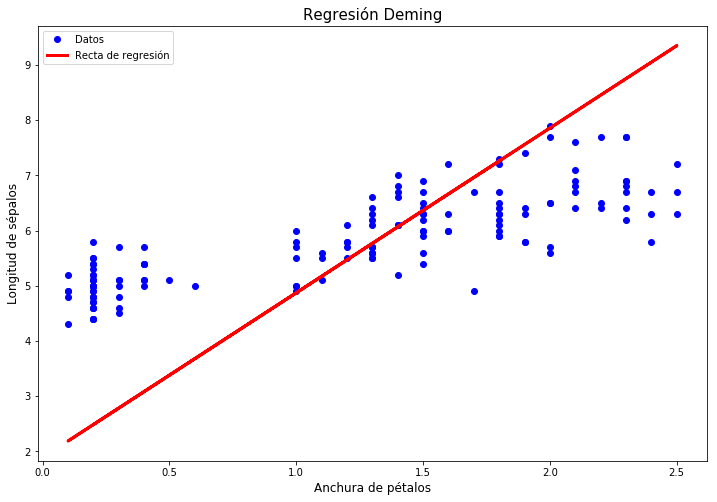

In [45]:
plt.figure(figsize=(12,8))
plt.plot(x_vals, y_vals, "bo", label="Datos")
plt.plot(x_vals, best_fit, "r-", linewidth=3, label="Recta de regresión")
plt.legend(loc="upper left")
plt.title("Regresión Deming", fontsize=15)
plt.xlabel("Anchura de pétalos", fontsize=12)
plt.ylabel("Longitud de sépalos", fontsize=12)
plt.show()

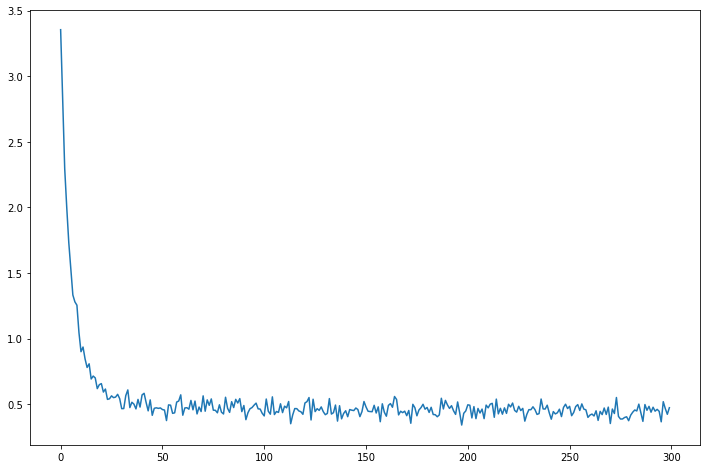

In [46]:
plt.figure(figsize=(12,8))
plt.plot(loss_vect)
plt.show()